In [1]:
#Yb-173#


from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j
from numpy import*
import matplotlib.pyplot as plt
import scipy.constants as C


In [2]:
#定义常数#


hbar = C.h/(2*pi) #约化普朗克常数
a0 = 5.2917721067e-11 #玻尔半径
K = [0,1,2]
n = 6
I = 5/2 #Yb-173
J = [0,1]
F1 = 5/2 #|1S_0>
F2 = [3/2,5/2,7/2] #|3P_1>

gamma = 2*pi*183.8e3 #自然线宽
freq_ref = 539390.405-4759.440e-3 #Yb-176(GHz)
#|1S_0>-|3P_1>: F = 3/2, F = 5/2, F = 7/2
freq = [freq_ref+4762.110e-3,freq_ref+3266.243e-3,freq_ref-1431.872e-3] #(GHz)!!!
product_J = 0.54*a0 #<1S_0||r||3P_1> #跃迁矩阵元


In [3]:
#定义函数：reduced polarizability#


def Alpha_K_F(light_freq,freq):
    
    detune = [0 for detune_num in range(len(freq))]
    
    for freq_num in range(len(freq)):
        detune[freq_num] = 2*pi*(light_freq-freq[freq_num])*1e9 #圆频率失谐(rad/s)
    
    alpha = [0 for i in range(len(K))] #定义数列维数
    
    for K_num in range(len(K)):
        term = 0
        #计算reduced polarizability
        for F_num in range(len(F2)):
            term = term + (-1)**(F2[F_num]+F1)*(2*F2[F_num]+1)*wigner_6j(1,K[K_num],1,F1,F2[F_num],F1)\
            *wigner_6j(F1,1,F2[F_num],J[1],I,J[0])**2\
            *(1/hbar)*(-detune[F_num]/(detune[F_num]**2+(gamma/2)**2))
        alpha[K_num] = (-1)**(K[K_num]+1)*(2*F1+1)*sqrt(2*K[K_num]+1)*(product_J*C.e)**2*term
        
    return alpha


In [4]:
#conventional polarizability#


#自变量输入(GHz)#
light_freq = C.c/(556.1) #光频率，自变量(GHz)
alpha_K = Alpha_K_F(light_freq,freq)


#conventional scalar polarizability
def Alpha_s_F(light_freq,freq):
    
    alpha_K = Alpha_K_F(light_freq,freq)
    alpha_s_F = 1/sqrt(3*(2*F1+1))*alpha_K[0]
    
    return alpha_s_F

alpha_s_F = Alpha_s_F(light_freq,freq)
print('alpha_0 is %.7e'%alpha_K[0])
print('alpha_s_F is %.7e\n'%alpha_s_F)


#conventional vector polarizability
def Alpha_v_F(light_freq,freq):
    
    alpha_K = Alpha_K_F(light_freq,freq)
    alpha_v_F = -sqrt(2*F1/((F1+1)*(2*F1+1)))*alpha_K[1]
    
    return alpha_v_F

alpha_v_F = Alpha_v_F(light_freq,freq)
print('alpha_1 is %.7e'%alpha_K[1])
print('alpha_v_F is %.7e\n'%alpha_v_F)


#conventional tensor polarizability
def Alpha_T_F(light_freq,freq):
    
    alpha_K = Alpha_K_F(light_freq,freq)
    alpha_T_F = -sqrt(2*F1*(2*F1-1)/(3*(F1+1)*(2*F1+1)*(2*F1+3)))*alpha_K[2]
    
    return alpha_T_F

alpha_T_F = Alpha_T_F(light_freq,freq)
print('alpha_2 is %.7e'%alpha_K[2])
print('alpha_T_F is %.7e'%alpha_T_F)


alpha_0 is 1.5478800e-37
alpha_s_F is 3.6483882e-38

alpha_1 is -1.4156930e-39
alpha_v_F is 6.9078745e-40

alpha_2 is 2.6744279e-40
alpha_T_F is -5.3275879e-41


In [5]:
#图示极化率随失谐变化#


def Polar_Polt(F):
    
    if F == 3/2:
        F_num = 0
    elif F == 5/2:
        F_num = 1
    elif F == 7/2:
        F_num = 2
    else:
        print('input error')
        return None
    
    step_num = 1000 #自变量
    delta_freq = 0.1 #自变量(GHz)
    freq1 = freq[F_num]-delta_freq
    freq2 = freq[F_num]+delta_freq
    step = 2*delta_freq/step_num #步长
    
    Light_freq = [0 for temp in range(step_num+1)] #定义数组维数
    y1 = [0 for temp in range(step_num+1)] #定义数组维数
    y2 = [0 for temp in range(step_num+1)] #定义数组维数
    
    for StepNum in range(step_num+1):
        Light_freq[StepNum] = freq1+step*StepNum #光频率(GHz)
        y1[StepNum] = Alpha_v_F(Light_freq[StepNum],freq) #conventional vector polarizability
        y2[StepNum] = Alpha_T_F(Light_freq[StepNum],freq) #conventional Tensor polarizability
    
    str1 = 'center frequency:|3P_1,F='
    str2 = str(int(F*2))
    str3 = '/2>-|1S_0,F=5/2>'
    string = str1+str2+str3
    
    #绘图
    plt.figure(figsize=(18,7))
    
    SubPlot1 = plt.subplot(1,2,1)
    plt.scatter(Light_freq,y1)
    plt.xlabel('frequency(GHz)')
    plt.ylabel('conventional vector polarizability')
    plt.title(string)
    
    SubPlot2 = plt.subplot(1,2,2)
    plt.scatter(Light_freq,y2)
    plt.xlabel('frequency(GHz)')
    plt.ylabel('conventional Tensor polarizability')
    plt.title(string)
    plt.show()
    return None

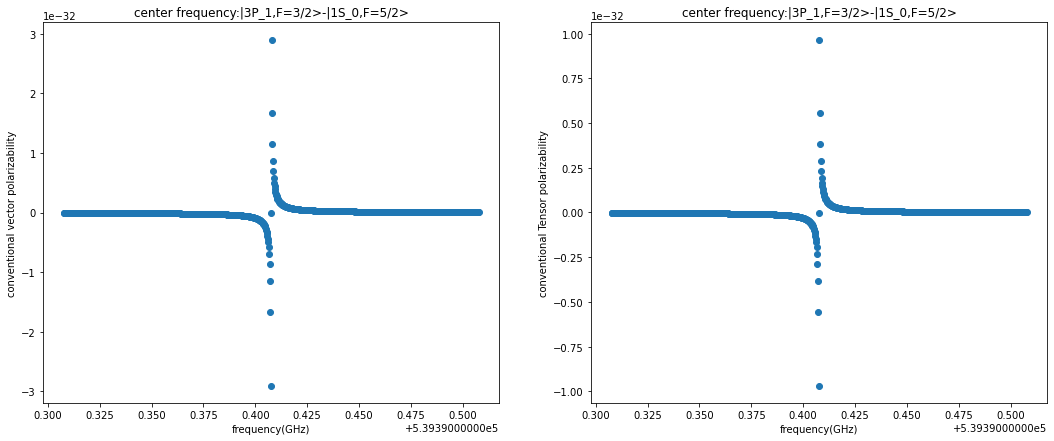

In [6]:
#F = 3/2#

Polar_Polt(3/2)

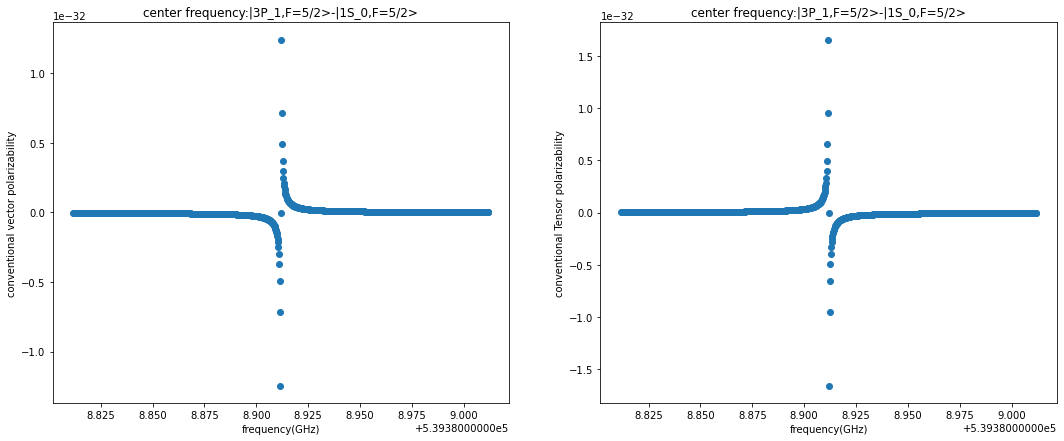

In [7]:
#F = 5/2#

Polar_Polt(5/2)

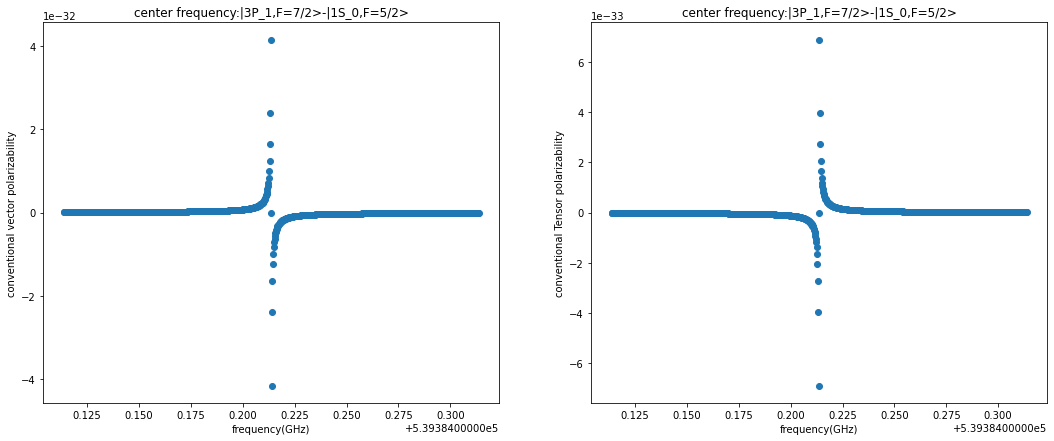

In [8]:
#F = 7/2#

Polar_Polt(7/2)